<a href="https://colab.research.google.com/github/KrishnaPrasanna21/Intacranial_Tumor_Detection/blob/main/tumordetection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET LOADING IN RUNTIME ENVIRONMENT


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

 92% 136M/149M [00:01<00:00, 144MB/s]
100% 149M/149M [00:01<00:00, 123MB/s]


In [ ]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

1 | Importing libraries

For ML Models: Tensorflow, keras

For Data Manipulation: numpy, pandas, sklearn

For Data Visualization: matplotlib, seaborn





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
%matplotlib inline

In [ ]:
# Building model
classifier = Sequential() #creating an object of sequential class

classifier.add(Convolution2D(100, (3,3), activation='relu', input_shape=(150, 150, 3))) #4 arguments where first is the number of filters,shape,
classifier.add(MaxPooling2D(2,2)) #pooling operation on the resultant feature maps we get after the convolution operation-reduce size of images

classifier.add(Convolution2D(100, (3,3), activation='relu')) 
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten()) #multi-dimensional to single
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu')) #fully connected-50 number of nodes in hidden
classifier.add(Dense(4, activation='softmax'))

In [ ]:
# Model Summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [ ]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/Training', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/Testing', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Model Checkpointing
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
# Training Model
history = classifier.fit(train_generator,
                                   epochs=10,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/10
572/572 [==============================] - ETA: 0s - loss: 0.2781 - accuracy: 0.7612

572/572 [==============================] - 838s 1s/step - loss: 0.2781 - accuracy: 0.7612 - val_loss: 0.2324 - val_accuracy: 0.8024
Epoch 2/10
572/572 [==============================] - ETA: 0s - loss: 0.1339 - accuracy: 0.9028

572/572 [==============================] - 835s 1s/step - loss: 0.1339 - accuracy: 0.9028 - val_loss: 0.1690 - val_accuracy: 0.8818
Epoch 3/10
572/572 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9407

572/572 [==============================] - 852s 1s/step - loss: 0.0896 - accuracy: 0.9407 - val_loss: 0.1093 - val_accuracy: 0.9230
Epoch 4/10
572/572 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9657

572/572 [==============================] - 855s 1s/step - loss: 0.0561 - accuracy: 0.9657 - val_loss: 0.0935 - val_accuracy: 0.9443
Epoch 5/10
572/572 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9774

572/572 [==============================] - 879s 2s/step - loss: 0.0379 - accuracy: 0.9774 - val_loss: 0.0878 - val_accuracy: 0.9542
Epoch 6/10
572/572 [==============================] - 863s 2s/step - loss: 0.0231 - accuracy: 0.9879 - val_loss: 0.1234 - val_accuracy: 0.9466
Epoch 7/10
572/572 [==============================] - 857s 1s/step - loss: 0.0211 - accuracy: 0.9890 - val_loss: 0.1386 - val_accuracy: 0.9252
Epoch 8/10
572/572 [==============================] - 855s 1s/step - loss: 0.0164 - accuracy: 0.9912 - val_loss: 0.1062 - val_accuracy: 0.9580
Epoch 9/10
572/572 [==============================] - 825s 1s/step - loss: 0.0207 - accuracy: 0.9893 - val_loss: 0.1145 - val_accuracy: 0.9542
Epoch 10/10
572/572 [==============================] - 853s 1s/step - loss: 0.0136 - accuracy: 0.9926 - val_loss: 0.0914 - val_accuracy: 0.9680


In [ ]:
import keras
# Define a new model that outputs the feature maps for each layer
layer_outputs = [layer.output for layer in classifier.layers]
activation_model = keras.models.Model(inputs=classifier.input, outputs=layer_outputs)

In [ ]:
# libraries need to prepare the data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


In [ ]:
# Select an image to test the feature maps
img = load_img('/content/Testing/glioma/Te-glTr_0007.jpg',target_size = (150,150))
img = np.expand_dims(img, axis=0)

In [ ]:
# Get the feature maps for each layer
activations = activation_model.predict(img)

1/1 [==============================] - 0s 182ms/step


conv2d
(148, 148, 100)


<Figure size 640x480 with 0 Axes>

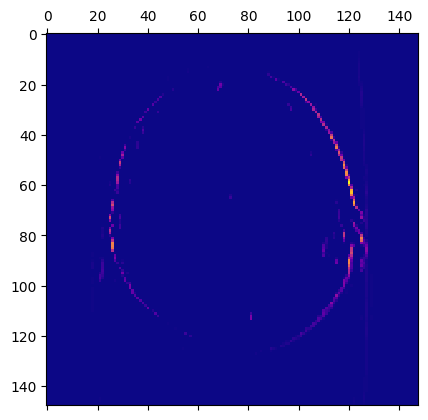

max_pooling2d
(74, 74, 100)


<Figure size 640x480 with 0 Axes>

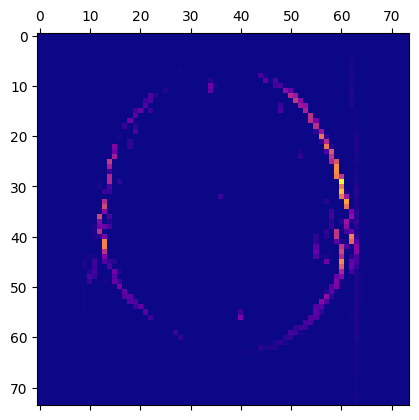

conv2d_1
(72, 72, 100)


<Figure size 640x480 with 0 Axes>

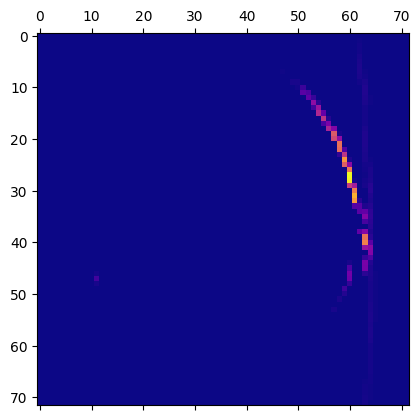

max_pooling2d_1
(36, 36, 100)


<Figure size 640x480 with 0 Axes>

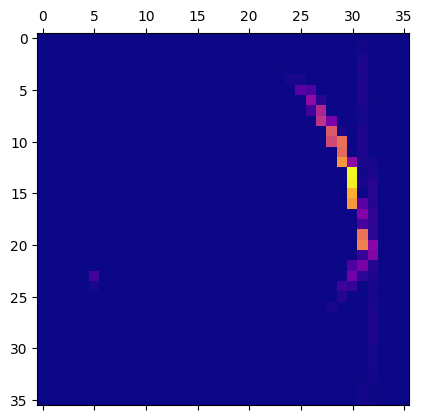

flatten
(129600,)


<Figure size 640x480 with 0 Axes>

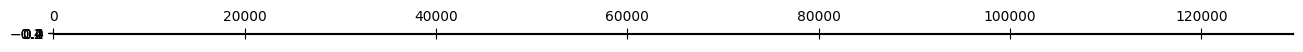

dropout
(129600,)


<Figure size 640x480 with 0 Axes>

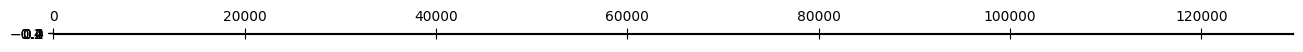

dense
(50,)


<Figure size 640x480 with 0 Axes>

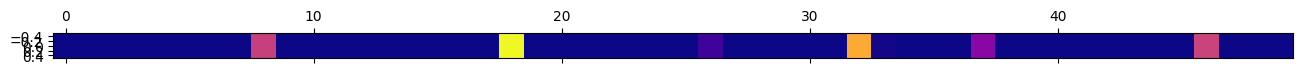

dense_1
(4,)


<Figure size 640x480 with 0 Axes>

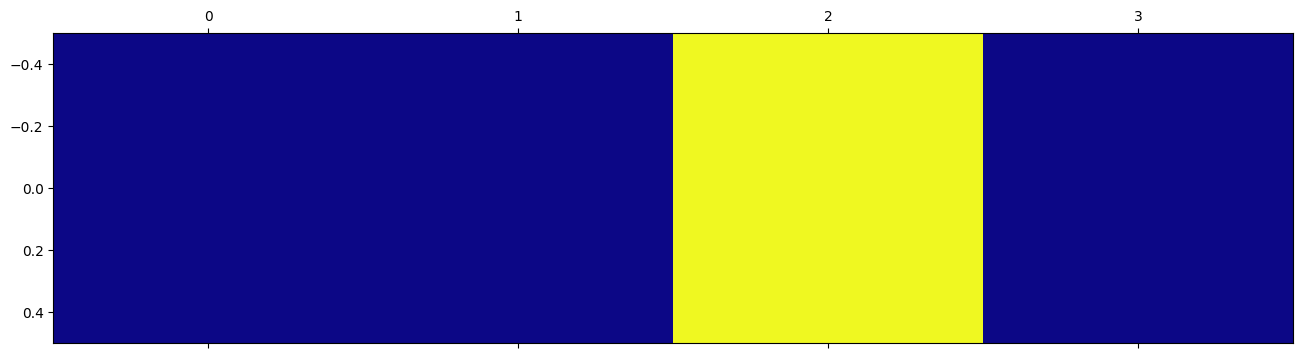

In [ ]:
# Plot the feature maps for each layer
for i, activation in enumerate(activations):
 # Get the name of the layer
 layer_name = classifier.layers[i].name
 # Print the name of the layer
 print(layer_name)
 print(activation.shape[1:])
 # Create a new figure
 plt.figure()
 # Check if the activation is a 4D tensor (batch, height, width, channels)
 if len(activations[i].shape) == 4:
 # Plot the first channel of the activation (assuming there is only one chan
    plt.matshow(activations[i][0, :, :, 0], cmap='plasma')
 # Check if the activation is a 2D tensor (samples, features)
 elif len(activations[i].shape) == 2:
 # Plot the activation as a matrix
    plt.matshow(activations[i][:, :], cmap='plasma')
 # Show the plot
 plt.show()

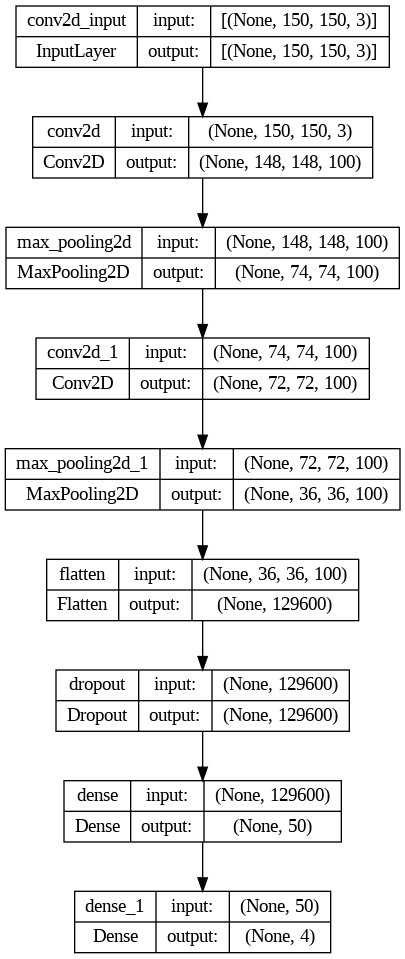

In [ ]:
# Visualize the model architecture
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='CNN_model.png', show_shapes=True, show_layer_names=True)

Text(0.5, 1.0, 'Accuracy Curve')

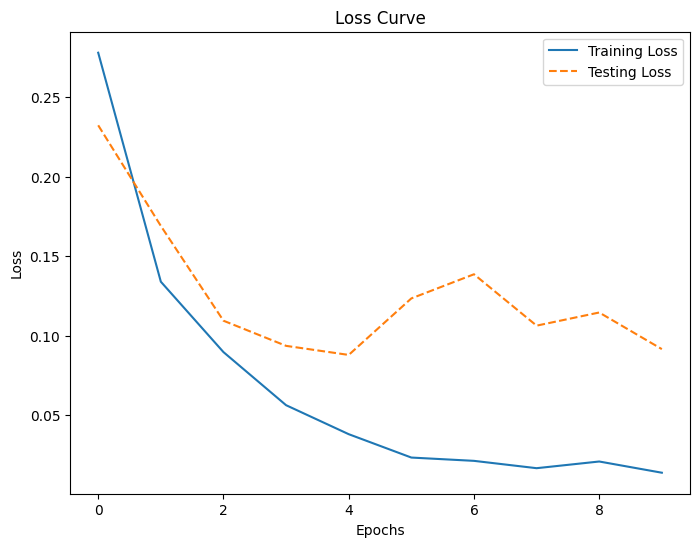

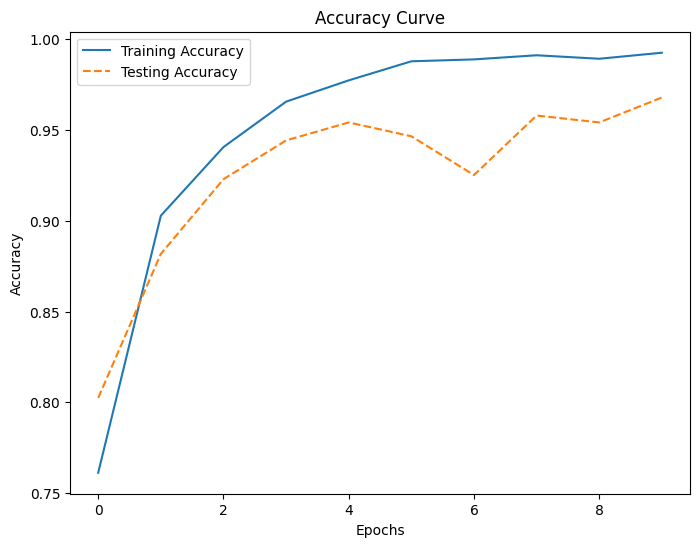

In [ ]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

In [ ]:
# Model Evaluation
classifier.evaluate(validation_generator)

132/132 [==============================] - 56s 427ms/step - loss: 0.7025 - accuracy: 0.2021


[0.7025302052497864, 0.20213577151298523]

In [ ]:
# libraries need to prepare the data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


In [ ]:
index = ['glioma','meningioma','normal','adenoma'] #4 CLASSES

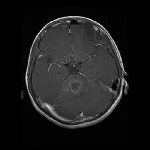

In [ ]:
#TESTING
test_image1 = load_img('/content/Testing/glioma/Te-glTr_0007.jpg',target_size = (150,150))
test_image1

In [ ]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(classifier.predict(test_image1/255.0),axis=1)
print(index[result1[0]])

1/1 [==============================] - 0s 159ms/step
glioma


In [ ]:
from PIL import Image

In [ ]:
test_image1.shape

(1, 150, 150, 3)

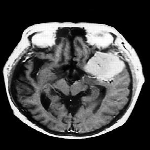

In [ ]:
test_image2 = load_img('/content/Testing/meningioma/Te-meTr_0005.jpg',target_size = (150,150))
test_image2

In [ ]:
test_image2 = img_to_array(test_image2)
arr=np.array(test_image2).reshape(-1,150,150,3)
predict=classifier.predict(arr)[0]
for i in range(4):
    print({index[i]:predict[i]})

1/1 [==============================] - 0s 85ms/step
{'glioma': 0.0}
{'meningioma': 1.0}
{'normal': 0.0}
{'adenoma': 0.0}


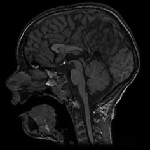

In [ ]:
test_image3 = load_img('/content/Testing/notumor/Te-no_0038.jpg',target_size = (150,150))
test_image3

In [ ]:
test_image3 = img_to_array(test_image3)
arr=np.array(test_image3).reshape(-1,150,150,3)
predict=classifier.predict(arr)[0]
for i in range(4):
    print({index[i]:predict[i]})

1/1 [==============================] - 0s 58ms/step
{'glioma': 0.0}
{'meningioma': 0.0}
{'normal': 1.0}
{'adenoma': 0.0}


In [ ]:
from keras.models import load_model
classifier.save("tumor.h5")

In [ ]:
from google.colab import files
files.download("tumor.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
classifier.save('tumor.h5')

In [ ]:
from keras.models import load_model

MODEL_PATH = '/content/drive/MyDrive/tumor.h5'

# Load Model
model = load_model(MODEL_PATH)

In [ ]:
# Model Evaluation
model.evaluate(validation_generator)

132/132 [==============================] - 46s 345ms/step - loss: 0.0914 - accuracy: 0.9680


[0.09144048392772675, 0.9679633975028992]

In [ ]:
index = ['glioma','meningioma','normal','adenoma'] #4 CLASSES

In [ ]:
img = load_img('/content/Testing/notumor/Te-no_0038.jpg',target_size = (150,150))

In [ ]:
import numpy as np
img = img_to_array(img)
arr=np.array(img).reshape(-1,150,150,3)
predict=model.predict(arr)[0]
for i in range(4):
    print({index[i]:predict[i]})

1/1 [==============================] - 0s 364ms/step
{'glioma': 0.0}
{'meningioma': 0.0}
{'normal': 1.0}
{'adenoma': 0.0}


to display on gradio

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 

In [ ]:
import gradio as gr

In [ ]:
def predict_image(test_img):
    test_img = img_to_array(test_img)
    arr=np.array(test_img).reshape(-1,150,150,3)
    predict=model.predict(arr)[0]
    d={
        'glioma':float(predict[0]),
       'meningioma' : float(predict[1]),
       'notumor': float(predict[2]),
       'pituitary': float(predict[3])
    }
    print(d)
    return d

In [ ]:
predict_image(img)

1/1 [==============================] - 0s 42ms/step
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 1.0, 'pituitary': 0.0}


{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 1.0, 'pituitary': 0.0}

In [ ]:
image=gr.inputs.Image(shape=(150,150))
label=gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image,inputs=image,outputs=label,capture_session=True).launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 51ms/step
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 1.0, 'pituitary': 0.0}
1/1 [==============================] - 0s 49ms/step
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 1.0}
1/1 [==============================] - 0s 51ms/step
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 1.0}
